In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
results = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')

Three questions to answer:
1. Race and Salary
2. How Highest Education Parents affect Education
3. Predict Salary

In [6]:
results.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [17]:
print(schema)

                   Column                                           Question
0              Respondent                               Respondent ID number
1            Professional         Which of the following best describes you?
2            ProgramHobby  Do you program as a hobby or contribute to ope...
3                 Country            In which country do you currently live?
4              University  Are you currently enrolled in a formal, degree...
..                    ...                                                ...
149  QuestionsInteresting                     The questions were interesting
150    QuestionsConfusing                       The questions were confusing
151     InterestedAnswers  I'm interested in learning how other developer...
152                Salary  What is your current annual base salary, befor...
153        ExpectedSalary  You said before that you are currently learnin...

[154 rows x 2 columns]


In [10]:
results.University.unique()

array(['No', 'Yes, full-time', 'Yes, part-time', 'I prefer not to say'],
      dtype=object)

In [26]:
results.Race.unique()

array(['White or of European descent', nan, 'Hispanic or Latino/Latina',
       'Native American, Pacific Islander, or Indigenous Australian; White or of European descent',
       'I prefer not to say', 'South Asian', 'Middle Eastern',
       'Hispanic or Latino/Latina; White or of European descent',
       'I don’t know',
       'Hispanic or Latino/Latina; Native American, Pacific Islander, or Indigenous Australian',
       'Middle Eastern; White or of European descent', 'East Asian',
       'Black or of African descent; White or of European descent',
       'Black or of African descent; East Asian; White or of European descent',
       'Middle Eastern; I don’t know',
       'East Asian; White or of European descent',
       'East Asian; South Asian; I don’t know', 'East Asian; South Asian',
       'Black or of African descent',
       'Native American, Pacific Islander, or Indigenous Australian',
       'Black or of African descent; Middle Eastern',
       'Black or of African descen

# Prepare data

In [3]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

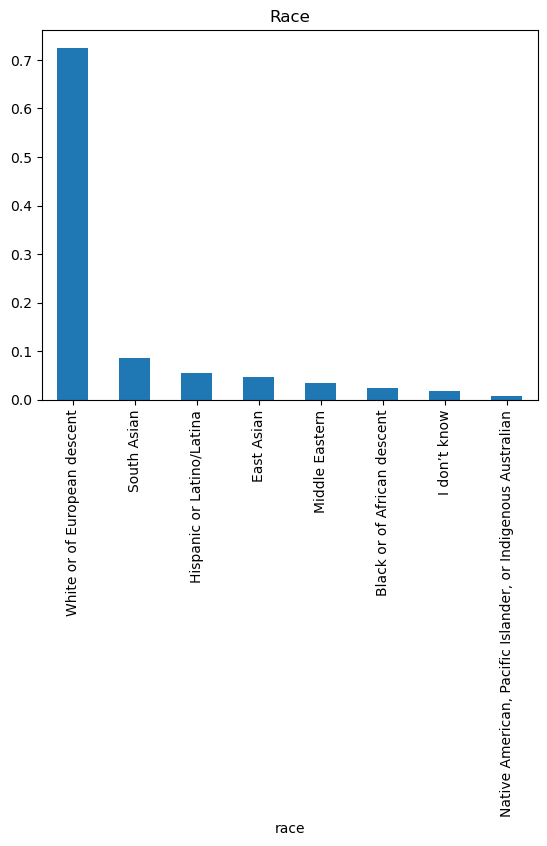

In [4]:
possible_vals = ["White or of European descent", "Hispanic or Latino/Latina", 
                 "Native American, Pacific Islander, or Indigenous Australian", "South Asian", "Middle Eastern",
                 "East Asian", "Black or of African descent", "I don’t know"]

def clean_and_plot(df, title='Race', plot=True):
    '''
    INPUT 
        df - a dataframe holding the Race column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the Race column.
    '''
    race = df['Race'].value_counts().reset_index()
    race.rename(columns={'index': 'race', 'Race': 'count'}, inplace=True)
    study_df = total_count(race, 'race', 'count', possible_vals)

    study_df.set_index('race', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
props_df = clean_and_plot(results)

In [35]:
props_df

,count
race,
White or of European descent,0.724860
South Asian,0.085403
Hispanic or Latino/Latina,0.054822
East Asian,0.047832
Middle Eastern,0.034886
Black or of African descent,0.024418
I don’t know,0.019198
"Native American, Pacific Islander, or Indigenous Australian",0.008582


In [5]:
def is_white(i):
    if isinstance(i, float):
        return False
    else:
        return 'White or of European descent' in i
results['isWhite'] = results['Race'].apply(is_white)

<AxesSubplot:xlabel='isWhite', ylabel='Salary'>

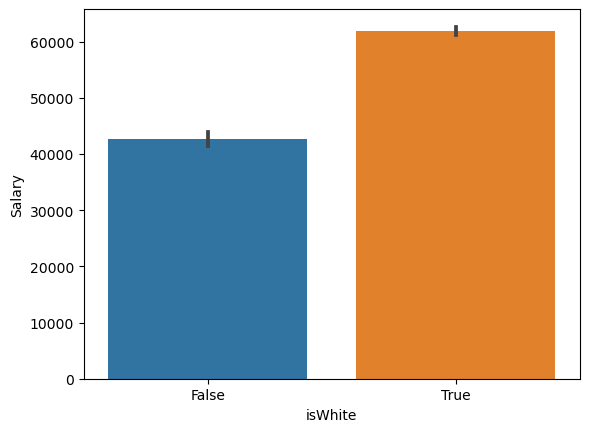

In [6]:
sns.barplot(data = results, y = 'Salary', x = 'isWhite')

<AxesSubplot:xlabel='Salary', ylabel='Count'>

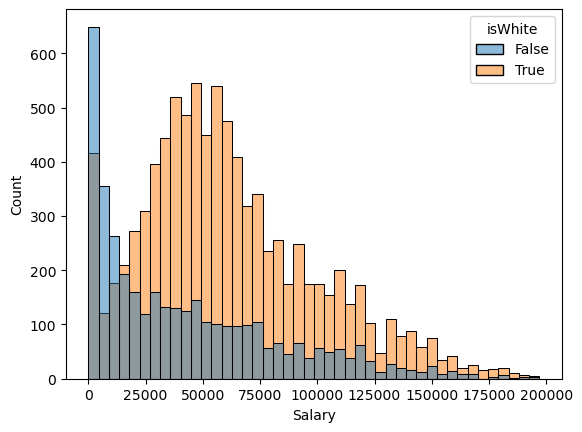

In [7]:
sns.histplot(data = results, x = 'Salary', hue = 'isWhite', alpha = .5)

# Question 2

<AxesSubplot:xlabel='FormalEducation', ylabel='count'>

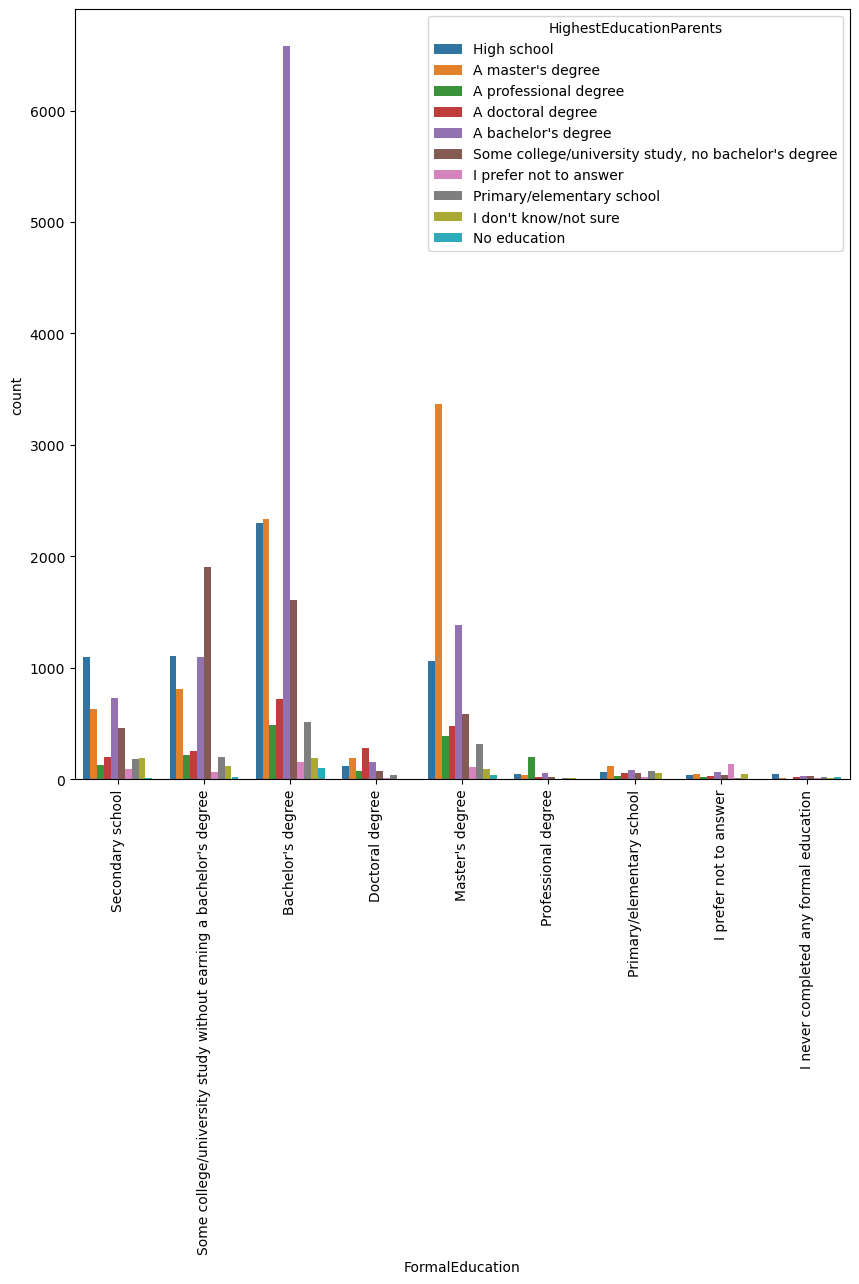

In [8]:
plt.figure(figsize = (10,10))
plt.xticks(rotation=90)
sns.countplot(data = results, hue = 'HighestEducationParents', x = 'FormalEducation')

Seems true that children follow their parents' experience

OneHotEncoder

In [13]:
from sklearn.model_selection import train_test_split

Keep only important features: Country, Currency, YearsCodedJob, Overpaid, CompanyType, YearsProgram

In [22]:
results.dropna(subset = ['Salary'], inplace = True)

In [23]:
X = results[['Country', 'Currency', 'YearsCodedJob', 'Overpaid', 'CompanyType', 'YearsProgram']]
X = pd.get_dummies(X, drop_first = True)

In [24]:
y = results['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
dtree = DecisionTreeRegressor()

In [27]:
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [28]:
y_preds = dtree.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, r2_score

In [37]:
r2_score(y_test, y_preds)

0.5361098989447671

In [39]:
dtree.decision_path

<bound method BaseDecisionTree.decision_path of DecisionTreeRegressor()>